In [244]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Set max rows and columns to display
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%matplotlib inline

# 1.  Load data

In [143]:
raw_data = pd.read_csv("Medical Appointment_Missed Appointment.csv")
data = pd.read_csv("Medical Appointment_Missed Appointment.csv")

In [144]:
data.shape

(110527, 14)

- the dataset has 110527 rows and 14 columns

In [145]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,FALSE,False,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,FALSE,False,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,FALSE,False,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,FALSE,False,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,FALSE,False,No


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighborhood    110527 non-null  object
 7   Scholarship     110527 non-null  bool  
 8   Hypertension    110527 non-null  bool  
 9   Diabetes        110527 non-null  bool  
 10  Alcoholism      110527 non-null  bool  
 11  Handicap        110527 non-null  object
 12  SMS_received    110527 non-null  bool  
 13  No_Show         110527 non-null  object
dtypes: bool(5), int64(3), object(6)
memory usage: 8.1+ MB


- use info() to understand the data type and have some initial ideas about how to preprocess the data. For example, the ScheduledDay and AppointmentDay are in object, maybe we need to change to datetime to make it easier

# 2. Data Cleaning and Pre-processing

## 2a. Check for duplicates
- There are no duplicates in this dataset

In [153]:
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


## 2b. Check for missing values
- There are no missing values in this dataset

In [154]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_Show           0
dtype: int64

## 3. EDA
- For example: There are 38687(35%) male and 71840(65%) female in this dataset

In [157]:
for col in ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show']:
    print(data[col].value_counts())
    print(data[col].value_counts(normalize=True))
    print('---------------------')

Gender
F    71840
M    38687
Name: count, dtype: int64
Gender
F    0.649977
M    0.350023
Name: proportion, dtype: float64
---------------------
Scholarship
False    99666
True     10861
Name: count, dtype: int64
Scholarship
False    0.901734
True     0.098266
Name: proportion, dtype: float64
---------------------
Hypertension
False    88726
True     21801
Name: count, dtype: int64
Hypertension
False    0.802754
True     0.197246
Name: proportion, dtype: float64
---------------------
Diabetes
False    102584
True       7943
Name: count, dtype: int64
Diabetes
False    0.928135
True     0.071865
Name: proportion, dtype: float64
---------------------
Alcoholism
False    107167
True       3360
Name: count, dtype: int64
Alcoholism
False    0.9696
True     0.0304
Name: proportion, dtype: float64
---------------------
Handicap
FALSE    108286
TRUE       2042
2           183
3            13
4             3
Name: count, dtype: int64
Handicap
FALSE    0.979724
TRUE     0.018475
2        0.001656

## 3a. replace categorical data into numerical representations

In [158]:
data['Gender'].replace({'M':1,'F':0}, inplace=True)
data['Scholarship'].replace({True:1,False:0}, inplace=True)
data['Hypertension'].replace({True:1,False:0}, inplace=True)
data['Diabetes'].replace({True:1,False:0}, inplace=True)
data['Alcoholism'].replace({True:1,False:0}, inplace=True)
data['Handicap'].replace({'TRUE':1,'FALSE':0, '2':1, '3':1, '4':1}, inplace=True)
data['SMS_received'].replace({True:1,False:0}, inplace=True)
data['No_Show'].replace({'Yes':1,'No':0}, inplace=True)

In [159]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [160]:
for col in ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show']:
    print(data[col].value_counts())
    print(data[col].value_counts(normalize=True))
    print('---------------------')

Gender
0    71840
1    38687
Name: count, dtype: int64
Gender
0    0.649977
1    0.350023
Name: proportion, dtype: float64
---------------------
Scholarship
0    99666
1    10861
Name: count, dtype: int64
Scholarship
0    0.901734
1    0.098266
Name: proportion, dtype: float64
---------------------
Hypertension
0    88726
1    21801
Name: count, dtype: int64
Hypertension
0    0.802754
1    0.197246
Name: proportion, dtype: float64
---------------------
Diabetes
0    102584
1      7943
Name: count, dtype: int64
Diabetes
0    0.928135
1    0.071865
Name: proportion, dtype: float64
---------------------
Alcoholism
0    107167
1      3360
Name: count, dtype: int64
Alcoholism
0    0.9696
1    0.0304
Name: proportion, dtype: float64
---------------------
Handicap
0    108286
1      2241
Name: count, dtype: int64
Handicap
0    0.979724
1    0.020276
Name: proportion, dtype: float64
---------------------
SMS_received
0    75045
1    35482
Name: count, dtype: int64
SMS_received
0    0.678974
1 

## 3b. Deal with ScheduledDay and ApptDay
- Notice that we don't have hours data for AppointmentDay, extract date out from ScheduledDay and ApptDay and use date only
- Create another column for days between ScheduledDay and AppointmentDay, maybe it will help model building

In [161]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')
data['ScheduledDayofWeek'] = data['ScheduledDay'].dt.isocalendar().week
data['ApptDayofWeek'] = data['AppointmentDay'].dt.isocalendar().week

In [163]:
data['waiting_days_time'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

In [164]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,ScheduledDayofWeek,ApptDayofWeek,waiting_days_time
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,17,17,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,17,17,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,17,17,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17,17,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,17,17,0


- drop the values that contains negative waiting_days_time

In [201]:
data = data[data['ScheduledDay'] <= data['AppointmentDay']]

In [202]:
len(data)

110521

- Create bins for waiting_days_time by looking into the distribution first

In [203]:
data['waiting_days_time'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days_time, dtype: float64

- most of the data lies between 0-20, a lot of outliers are larger than 40

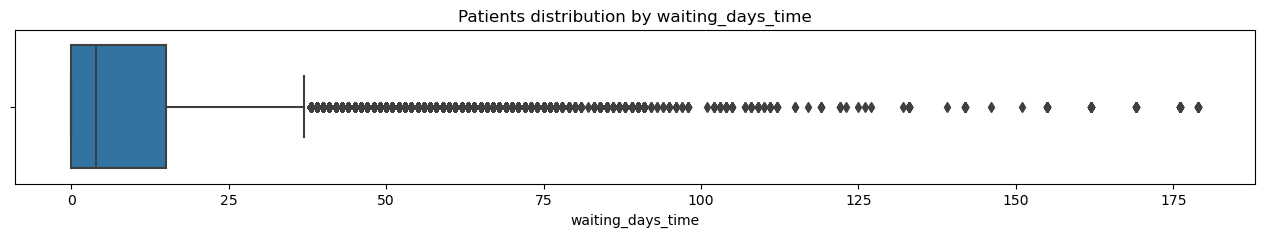

In [204]:
plt.figure(figsize=(16,2))
boxplot_wdt= sns.boxplot(x=data['waiting_days_time'])
boxplot_wdt.set_title("Patients distribution by waiting_days_time")
plt.show()

In [205]:
data['waiting_days_bins'] = pd.cut(data['waiting_days_time'], bins=[0,7,14,21,28,179], labels=['within 1 wk', 'within 2 wks', 'within 3 wks', 'within 4 wks','Over 1 month'],  include_lowest=True)

In [206]:
data['waiting_days_bins'].value_counts()

waiting_days_bins
within 1 wk     70747
Over 1 month    12171
within 2 wks    12025
within 3 wks     8874
within 4 wks     6704
Name: count, dtype: int64

In [207]:
data['waiting_days_bins'].value_counts(normalize=True)

waiting_days_bins
within 1 wk     0.640123
Over 1 month    0.110124
within 2 wks    0.108803
within 3 wks    0.080292
within 4 wks    0.060658
Name: proportion, dtype: float64

- Extracting day name from ScheduledDay and AppointmentDay and create another columns 

In [208]:
data['ScheduledDayOfWeek'] = data['ScheduledDay'].dt.day_name()
data['ApptDayOfWeek'] = data['AppointmentDay'].dt.day_name()
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,ScheduledDayofWeek,ApptDayofWeek,waiting_days_time,waiting_days_bins,ScheduledDayOfWeek,ApptDayOfWeek,Age_bins,no_show_before,chronic_disease
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,61-120,0,1
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,46-60,0,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,61-120,0,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,0-15,1,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,46-60,0,1


## 3c. Work on age and look into the distribution
- Majority of the patients are between 18-58

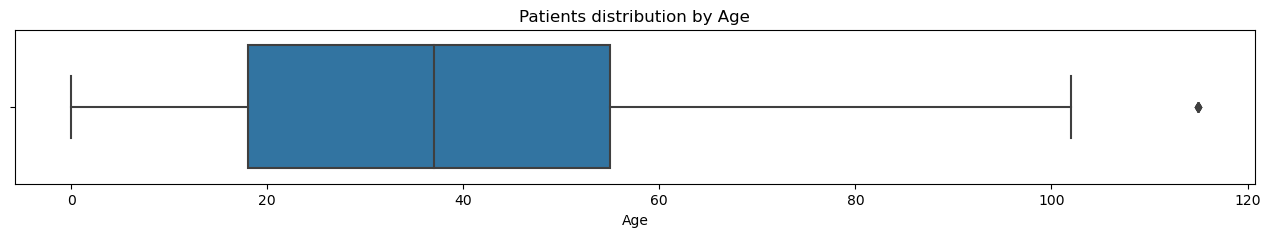

In [209]:
plt.figure(figsize=(16,2))
boxplot_age = sns.boxplot(x=data['Age'])
boxplot_age.set_title("Patients distribution by Age")
plt.show()

- drop negative ages

In [210]:
data = data[(data['Age'] >= 0)]

- create age bins

In [211]:
data['Age_bins'] = pd.cut(data['Age'], bins=[0,15,30,45,60,120], labels=['0-15', '16-30', '31-45', '46-60','61-120'],  include_lowest=True)

In [212]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,ScheduledDayofWeek,ApptDayofWeek,waiting_days_time,waiting_days_bins,ScheduledDayOfWeek,ApptDayOfWeek,Age_bins,no_show_before,chronic_disease
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,61-120,0,1
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,46-60,0,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,61-120,0,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,0-15,1,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,17,17,0,within 1 wk,Friday,Friday,46-60,0,1


In [213]:
data['Age_bins'].value_counts()

Age_bins
0-15      24467
46-60     23179
31-45     21953
16-30     21161
61-120    19761
Name: count, dtype: int64

In [214]:
data['Age_bins'].value_counts(normalize=True)

Age_bins
0-15      0.221379
46-60     0.209725
31-45     0.198632
16-30     0.191466
61-120    0.178799
Name: proportion, dtype: float64

- use groupby to understand the no_show for each age bins

In [215]:
grouped_cnts = data.groupby(['Age_bins',  'No_Show'])['PatientId'].count()
grouped_cnts

Age_bins  No_Show
0-15      0          19220
          1           5247
16-30     0          15921
          1           5240
31-45     0          17262
          1           4691
46-60     0          19048
          1           4131
61-120    0          16756
          1           3005
Name: PatientId, dtype: int64

In [216]:
total_cnts = data.groupby('Age_bins')['PatientId'].count()
total_cnts

Age_bins
0-15      24467
16-30     21161
31-45     21953
46-60     23179
61-120    19761
Name: PatientId, dtype: int64

In [217]:
percentages = (grouped_cnts / total_cnts) * 100
percentages

Age_bins  No_Show
0-15      0          78.554788
          1          21.445212
16-30     0          75.237465
          1          24.762535
31-45     0          78.631622
          1          21.368378
46-60     0          82.177833
          1          17.822167
61-120    0          84.793280
          1          15.206720
Name: PatientId, dtype: float64

- bar chart for easy visualization

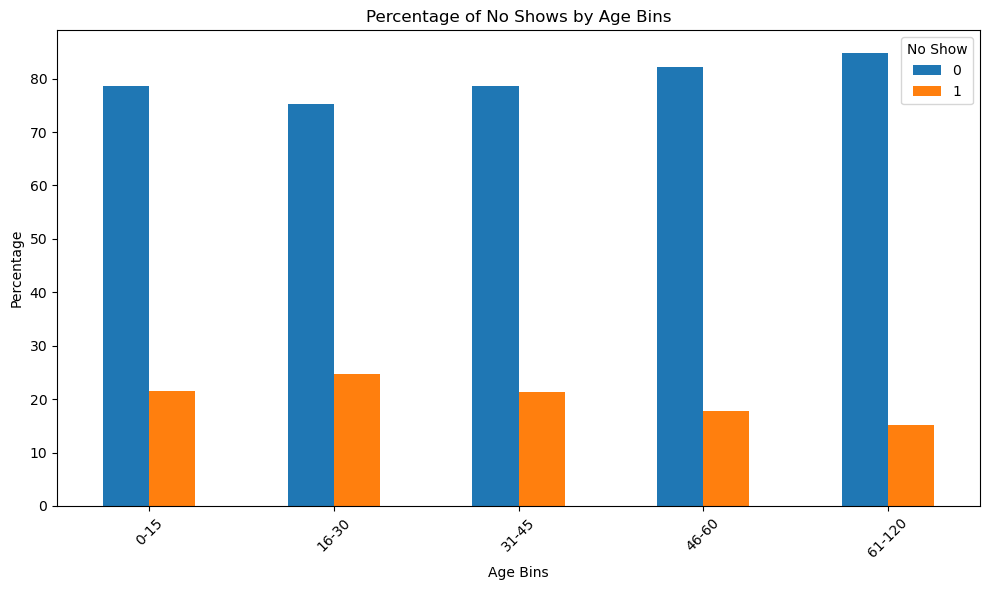

In [218]:
percentages.unstack().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Age Bins')
plt.ylabel('Percentage')
plt.title('Percentage of No Shows by Age Bins')
plt.xticks(rotation=45)  
plt.legend(title='No Show')


plt.tight_layout()
plt.show()

- Patients with age 16-30 seems have higher no-show rate

## 3d. Look into Neighborhood column
- There are 81 different neighborhoods

In [219]:
data['Neighborhood'].nunique()

81

<Axes: xlabel='Neighborhood'>

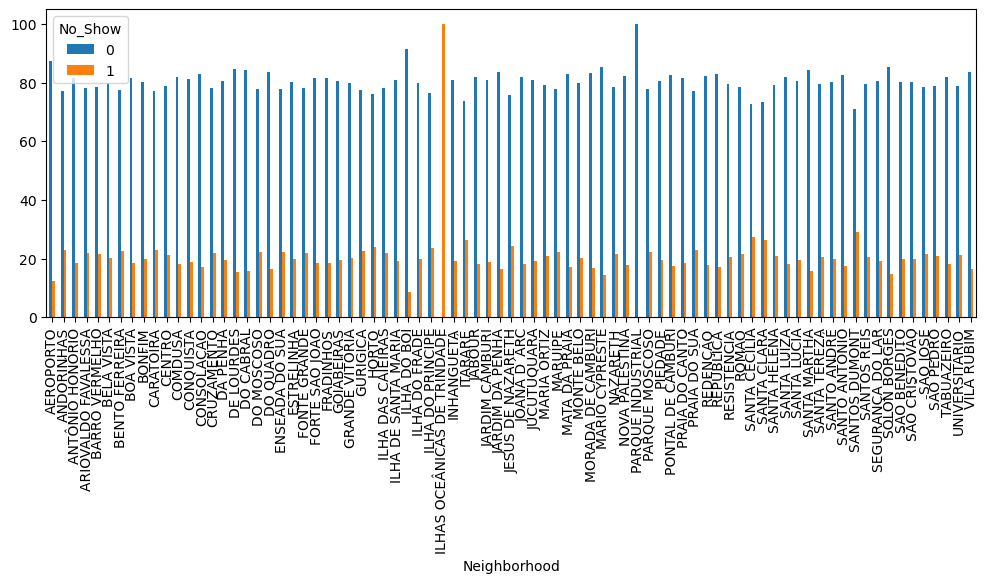

In [220]:
grouped_cnts = data.groupby(['Neighborhood',  'No_Show'])['PatientId'].count()
total_cnts = data.groupby(['Neighborhood'])['PatientId'].count()
percentages = (grouped_cnts / total_cnts) * 100

percentages.unstack().plot(kind='bar', figsize=(12, 4))

- Looks like most of the neighborhood has around 20% of no show rate, some of them have very high or low no show rate. Maybe the distance is causing the high/low no show rate, but we're have to do further investigate.

## 3e. Other columns
- Create another column for someone who have previous no-show and someone who have chronic disease (Hypertension+Diabetes) 

In [221]:
no_show_before_grouped = pd.DataFrame(data.groupby('PatientId')['No_Show'].sum())
no_show_before_list = list(set(no_show_before_grouped[no_show_before_grouped['No_Show'] != 0].index))
data['no_show_before'] = data['PatientId'].apply(lambda x: 1 if x in no_show_before_list else 0)

In [222]:
data['chronic_disease'] = data['Hypertension'] | data['Diabetes']

In [223]:
data['ScheduledDayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday': 5,'Saturday':6}, inplace=True)
data['ApptDayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday': 5,'Saturday':6}, inplace=True)

In [224]:
alist = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
         'ScheduledDayofWeek', 'ApptDayofWeek', 'waiting_days_time',
       'waiting_days_bins', 'ScheduledDayOfWeek', 'ApptDayOfWeek', 'Age_bins',
       'no_show_before', 'chronic_disease']

for col1 in alist:
    grouped_cnts = data.groupby([col1,  'No_Show'])['PatientId'].count()
    total_cnts = data.groupby([col1])['PatientId'].count()
    percentages = (grouped_cnts / total_cnts) * 100
    
    print(grouped_cnts)
    print(percentages)
    print('---------------------------')

Gender  No_Show
0       0          57245
        1          14591
1       0          30962
        1           7723
Name: PatientId, dtype: int64
Gender  No_Show
0       0          79.688457
        1          20.311543
1       0          80.036190
        1          19.963810
Name: PatientId, dtype: float64
---------------------------
Scholarship  No_Show
0            0          79924
             1          19736
1            0           8283
             1           2578
Name: PatientId, dtype: int64
Scholarship  No_Show
0            0          80.196669
             1          19.803331
1            0          76.263696
             1          23.736304
Name: PatientId, dtype: float64
---------------------------
Hypertension  No_Show
0             0          70178
              1          18542
1             0          18029
              1           3772
Name: PatientId, dtype: int64
Hypertension  No_Show
0             0          79.100541
              1          20.899459
1     

no_show_before  No_Show
0               0          67490
1               0          20717
                1          22314
Name: PatientId, dtype: int64
no_show_before  No_Show
0               0          100.000000
1               0           48.144361
                1           51.855639
Name: PatientId, dtype: float64
---------------------------
chronic_disease  No_Show
0                0          69010
                 1          18253
1                0          19197
                 1           4061
Name: PatientId, dtype: int64
chronic_disease  No_Show
0                0          79.082773
                 1          20.917227
1                0          82.539341
                 1          17.460659
Name: PatientId, dtype: float64
---------------------------


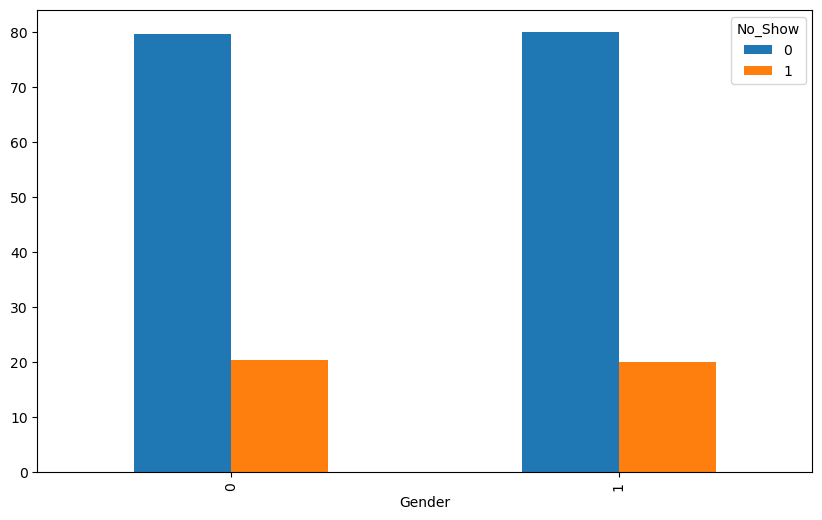

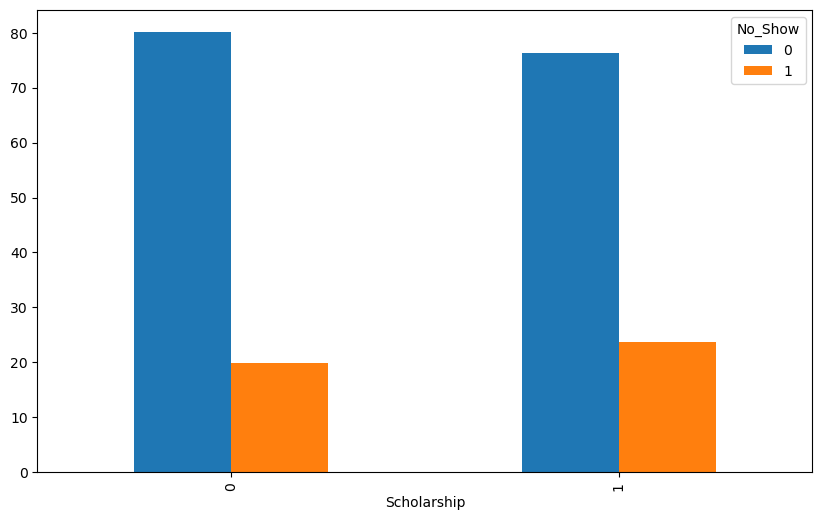

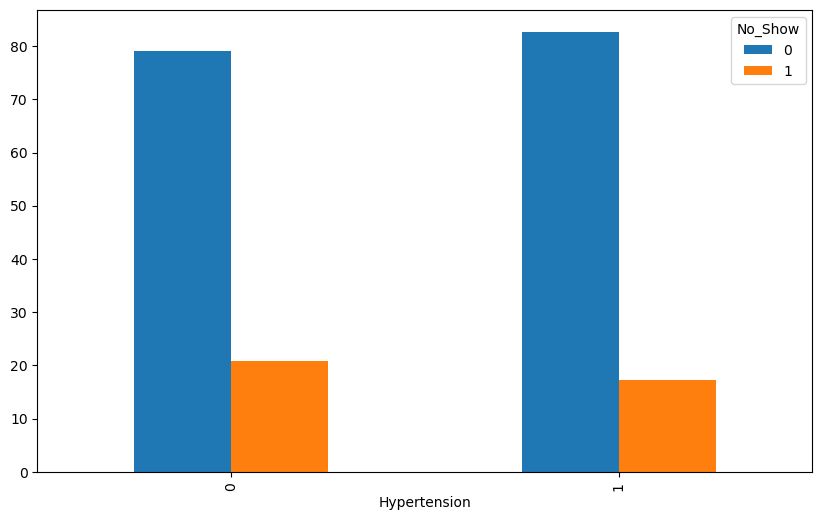

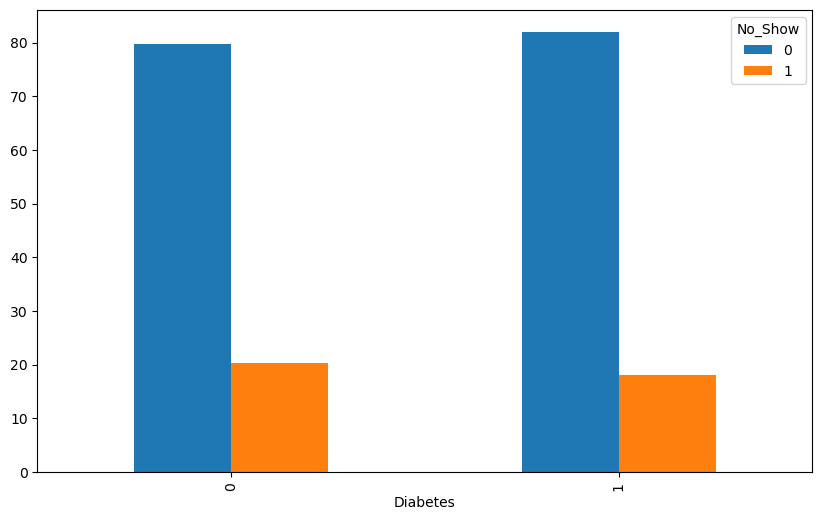

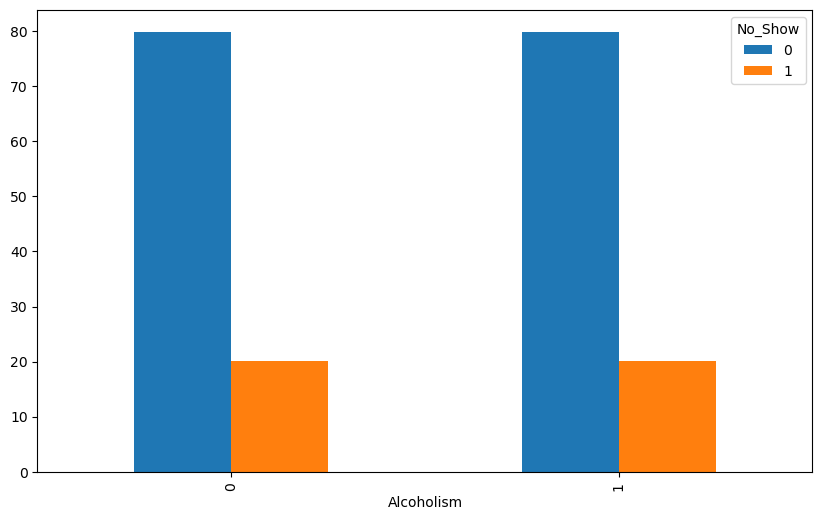

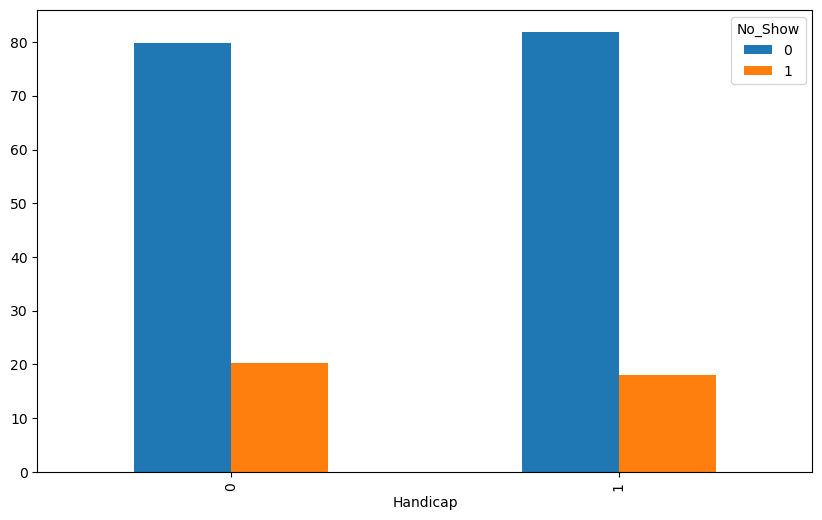

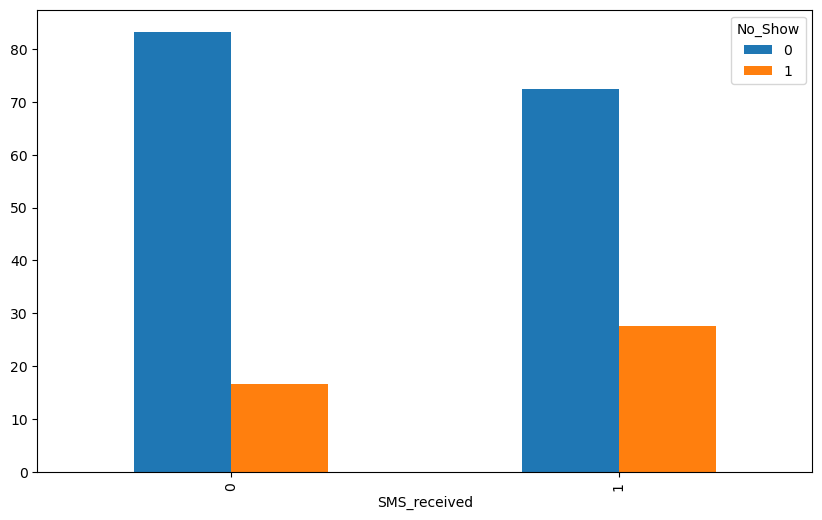

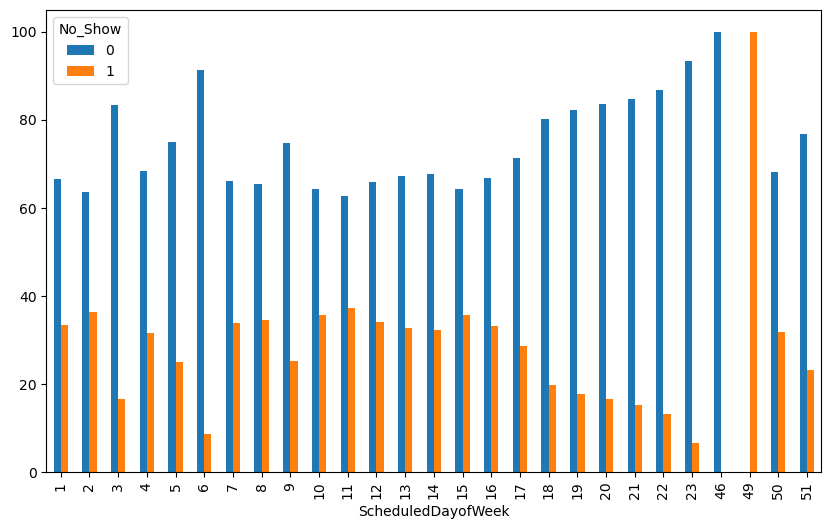

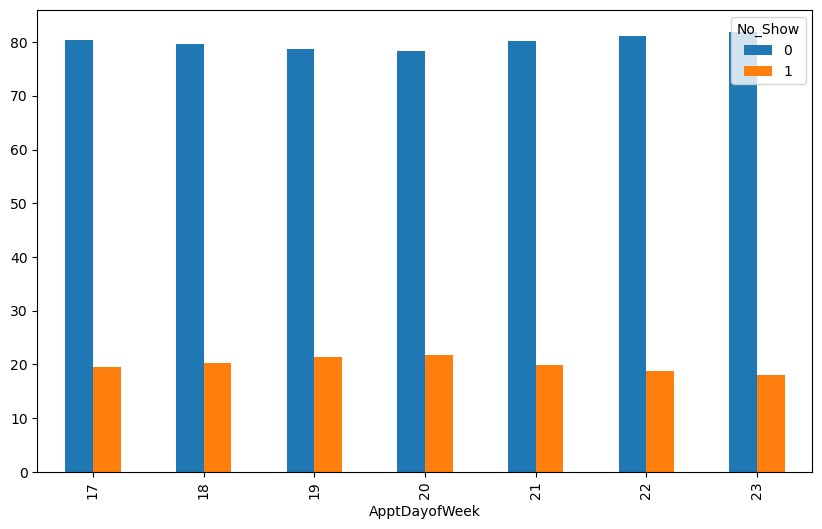

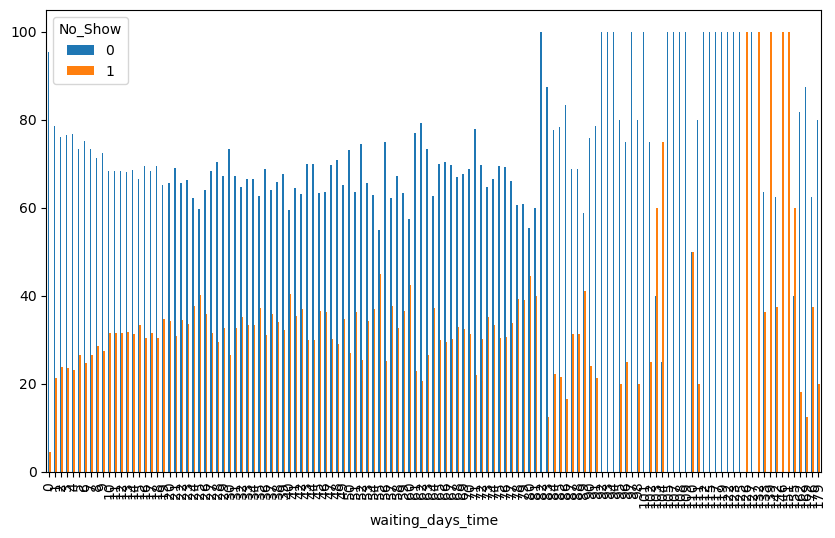

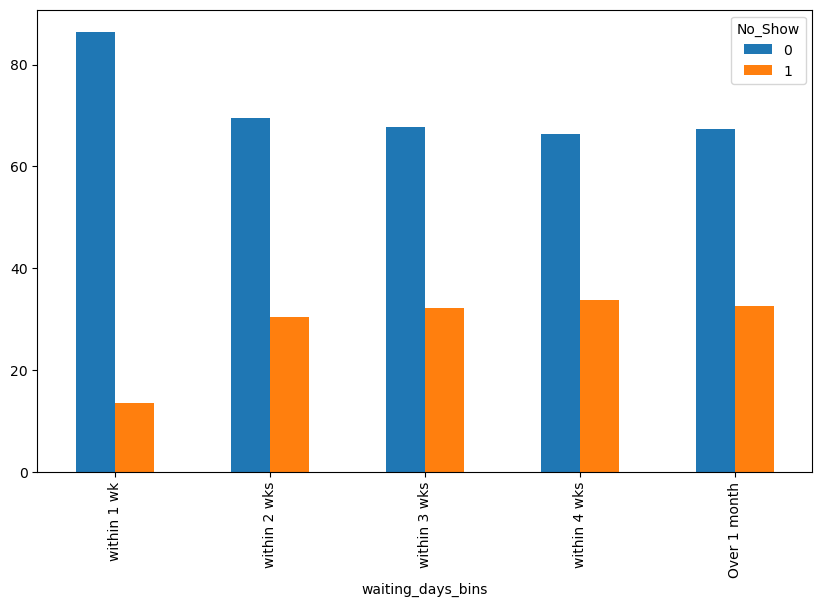

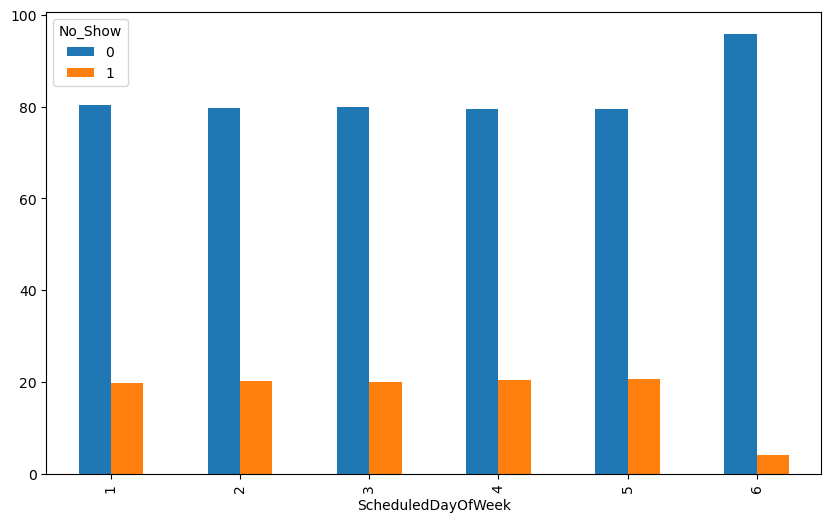

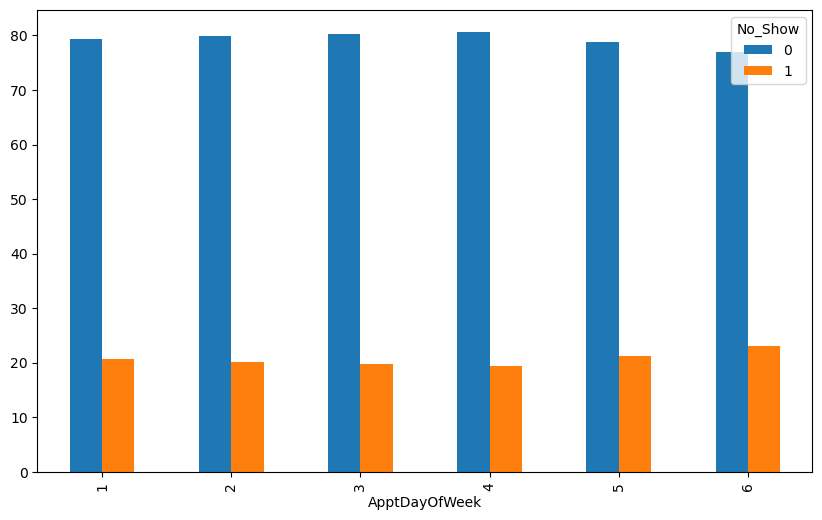

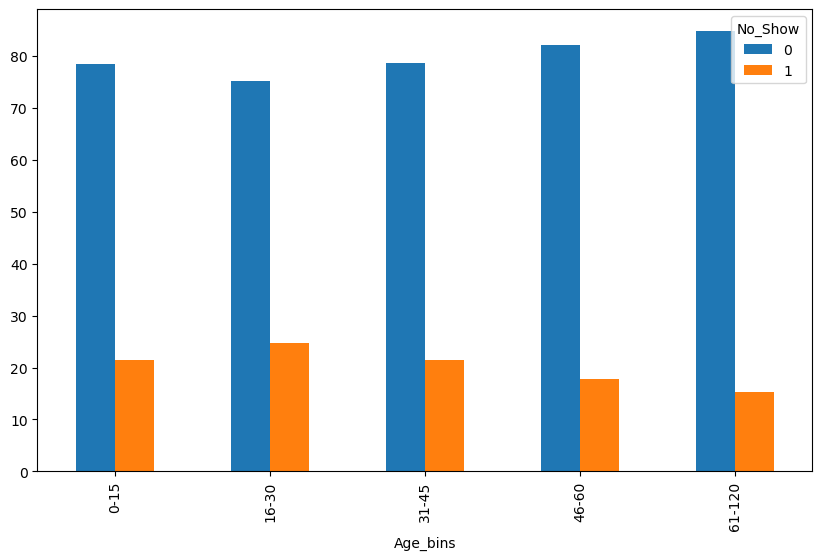

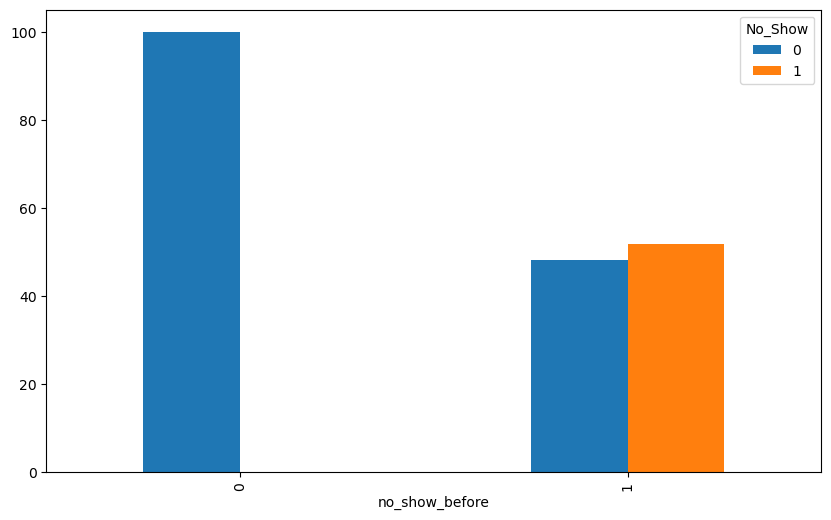

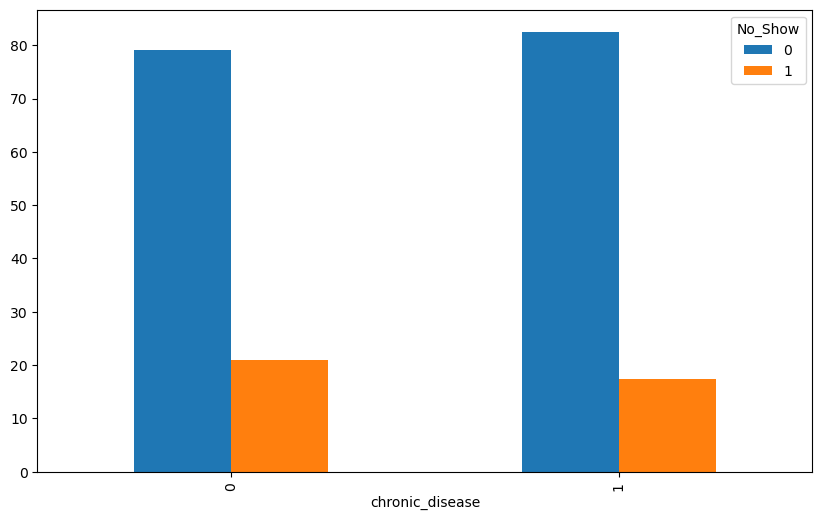

In [225]:
for col1 in alist:
    grouped_cnts = data.groupby([col1,  'No_Show'])['PatientId'].count()
    total_cnts = data.groupby([col1])['PatientId'].count()
    percentages = (grouped_cnts / total_cnts) * 100
    
    percentages.unstack().plot(kind='bar', figsize=(10, 6))

- Gender: 0 stands for female, 1 for male. We can see that females have more appointments than men. However, by looking at the percentage, there is not much difference. 
- Scholarship: Looking at the percentage, there is about 4% of the difference in no-show rate between Scholarship=0 and Scholarship=1. Surprisingly, The patient with financial aid from the government has a higher no-show rate.
-  Hypertension: Patients with hypertension have a lower no-show rate. 
- Diabetes: Patients with diabetes have a lower no-show rate.
- Alcoholism: There are no significant differences between the two groups on the no-show rate.
- Handicap: There is about a 2% difference between the two groups, but not much.
- SMS_received: There is almost a 10 % difference between the no-show rate for the two groups. People who get SMS seem to miss the appointment more often than someone who doesn’t receive SMS.
- ScheduledDayofWeek: There are a lot of differences throughout those weeks, looks like we have more appointments scheduled during the middle of the year.  
- ApptDayofWeek: Most of the appointments are between week 17 and week 23, and they have around 20% of the no-show rate. 
- waiting_days_bins: Looking at the percentage, waiting periods are within 1 week have lowest no-show rate, probably because the patients are paying attention or the seriousness of the case. 
- ScheduledDayofWeek & ApptDayOfWeek: Saturday has the lowest no-show rate but we don’t have a lot of data for Saturday. 
- Age_bins: Looking at the percentage, people between 16 and 30 skip appointments more, and older people attend appointments more.
- no_show_before: People who have no shows before tend to no show again, with a 51% rate. 
-  Chronic_disease: I’m curious to see how chronic disease plays in this dataset, so I combine hypertension and diabetes, and it turns out the no-show rate is around 4% rate lower if someone has the disease.

# 4. Model Building- 1st version

## 4a. Feature selection 

In [226]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show',
       'ScheduledDayofWeek', 'ApptDayofWeek', 'waiting_days_time',
       'waiting_days_bins', 'ScheduledDayOfWeek', 'ApptDayOfWeek', 'Age_bins',
       'no_show_before', 'chronic_disease'],
      dtype='object')

In [227]:
data2 = data[['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 
              'Handicap', 'SMS_received', 'No_Show','waiting_days_time', 'ScheduledDayOfWeek',
              'ApptDayOfWeek', 'no_show_before', 'chronic_disease']]

In [228]:
data2.corr()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,waiting_days_time,ScheduledDayOfWeek,ApptDayOfWeek,no_show_before,chronic_disease
Gender,1.000000,-0.106439,-0.114297,-0.055721,-0.032555,0.106170,0.022391,-0.046301,-0.004132,-0.028411,0.004854,0.003933,-0.007193,-0.053186
Age,-0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.083827,0.012629,-0.060320,0.034813,0.011387,0.003043,-0.046542,0.514555
Scholarship,-0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.009068,0.001182,0.029166,-0.030435,-0.004965,-0.000682,0.042719,-0.019580
Hypertension,-0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.084949,-0.006285,-0.035662,-0.017236,0.000681,0.003442,-0.031390,0.960188
Diabetes,-0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.059204,-0.014561,-0.015158,-0.027200,-0.000385,0.006607,-0.007730,0.539007
Alcoholism,0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.003715,-0.026154,-0.000181,-0.038527,0.006629,0.002696,0.015433,0.089974
Handicap,0.022391,0.083827,-0.009068,0.084949,0.059204,0.003715,1.000000,-0.025148,-0.007528,-0.020885,0.001139,0.004697,-0.001020,0.084738
SMS_received,-0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.025148,1.000000,0.126502,0.398128,0.078552,-0.089880,0.069920,-0.008169
No_Show,-0.004132,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.007528,0.126502,1.000000,0.186320,0.006005,0.001189,0.629892,-0.035100
waiting_days_time,-0.028411,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.020885,0.398128,0.186320,1.000000,0.014618,-0.011341,0.076755,-0.020187


In [229]:
data_preprocessed = data[['Gender', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Handicap', 'SMS_received', 'No_Show',
       'ScheduledDayofWeek', 'ApptDayofWeek', 'waiting_days_time',
       'waiting_days_bins', 'ScheduledDayOfWeek', 'ApptDayOfWeek', 'Age_bins',
       'no_show_before', 'chronic_disease']]

In [232]:
len(data_preprocessed.columns)

17

- Based on the EDA and correlation, we selected these 17 parameters to build the 1st version of our model.

In [233]:
data_preprocessed

,Gender,Neighborhood,Scholarship,Hypertension,Diabetes,Handicap,SMS_received,No_Show,ScheduledDayofWeek,ApptDayofWeek,waiting_days_time,waiting_days_bins,ScheduledDayOfWeek,ApptDayOfWeek,Age_bins,no_show_before,chronic_disease
0,0,JARDIM DA PENHA,0,1,0,0,0,0,17,17,0,within 1 wk,5,5,61-120,0,1
1,1,JARDIM DA PENHA,0,0,0,0,0,0,17,17,0,within 1 wk,5,5,46-60,0,0
2,0,MATA DA PRAIA,0,0,0,0,0,0,17,17,0,within 1 wk,5,5,61-120,0,0
3,0,PONTAL DE CAMBURI,0,0,0,0,0,0,17,17,0,within 1 wk,5,5,0-15,1,0
4,0,JARDIM DA PENHA,0,1,1,0,0,0,17,17,0,within 1 wk,5,5,46-60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,MARIA ORTIZ,0,0,0,0,1,0,18,23,35,Over 1 month,2,2,46-60,1,0
110523,0,MARIA ORTIZ,0,0,0,0,1,0,18,23,35,Over 1 month,2,2,46-60,1,0
110524,0,MARIA ORTIZ,0,0,0,0,1,0,17,23,41,Over 1 month,3,2,16-30,0,0
110525,0,MARIA ORTIZ,0,0,0,0,1,0,17,23,41,Over 1 month,3,2,31-45,0,0


In [234]:
X = data_preprocessed[['Gender', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Handicap', 'SMS_received', 'ScheduledDayofWeek', 'ApptDayofWeek', 'waiting_days_time',
       'waiting_days_bins', 'ScheduledDayOfWeek', 'ApptDayOfWeek', 'Age_bins',
       'no_show_before', 'chronic_disease']]
y = data_preprocessed['No_Show']

In [235]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: No_Show, dtype: int64

In [236]:
X_dummy = pd.get_dummies(X)

In [237]:
list(X_dummy.columns)

['Gender',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Handicap',
 'SMS_received',
 'ScheduledDayofWeek',
 'ApptDayofWeek',
 'waiting_days_time',
 'ScheduledDayOfWeek',
 'ApptDayOfWeek',
 'no_show_before',
 'chronic_disease',
 'Neighborhood_AEROPORTO',
 'Neighborhood_ANDORINHAS',
 'Neighborhood_ANTÔNIO HONÓRIO',
 'Neighborhood_ARIOVALDO FAVALESSA',
 'Neighborhood_BARRO VERMELHO',
 'Neighborhood_BELA VISTA',
 'Neighborhood_BENTO FERREIRA',
 'Neighborhood_BOA VISTA',
 'Neighborhood_BONFIM',
 'Neighborhood_CARATOÍRA',
 'Neighborhood_CENTRO',
 'Neighborhood_COMDUSA',
 'Neighborhood_CONQUISTA',
 'Neighborhood_CONSOLAÇÃO',
 'Neighborhood_CRUZAMENTO',
 'Neighborhood_DA PENHA',
 'Neighborhood_DE LOURDES',
 'Neighborhood_DO CABRAL',
 'Neighborhood_DO MOSCOSO',
 'Neighborhood_DO QUADRO',
 'Neighborhood_ENSEADA DO SUÁ',
 'Neighborhood_ESTRELINHA',
 'Neighborhood_FONTE GRANDE',
 'Neighborhood_FORTE SÃO JOÃO',
 'Neighborhood_FRADINHOS',
 'Neighborhood_GOIABEIRAS',
 'Neighborhood_GRANDE VITÓRIA'

In [238]:
X_dummy.head()

,Gender,Scholarship,Hypertension,Diabetes,Handicap,SMS_received,ScheduledDayofWeek,ApptDayofWeek,waiting_days_time,ScheduledDayOfWeek,ApptDayOfWeek,no_show_before,chronic_disease,Neighborhood_AEROPORTO,Neighborhood_ANDORINHAS,Neighborhood_ANTÔNIO HONÓRIO,Neighborhood_ARIOVALDO FAVALESSA,Neighborhood_BARRO VERMELHO,Neighborhood_BELA VISTA,Neighborhood_BENTO FERREIRA,Neighborhood_BOA VISTA,Neighborhood_BONFIM,Neighborhood_CARATOÍRA,Neighborhood_CENTRO,Neighborhood_COMDUSA,Neighborhood_CONQUISTA,Neighborhood_CONSOLAÇÃO,Neighborhood_CRUZAMENTO,Neighborhood_DA PENHA,Neighborhood_DE LOURDES,Neighborhood_DO CABRAL,Neighborhood_DO MOSCOSO,Neighborhood_DO QUADRO,Neighborhood_ENSEADA DO SUÁ,Neighborhood_ESTRELINHA,Neighborhood_FONTE GRANDE,Neighborhood_FORTE SÃO JOÃO,Neighborhood_FRADINHOS,Neighborhood_GOIABEIRAS,Neighborhood_GRANDE VITÓRIA,Neighborhood_GURIGICA,Neighborhood_HORTO,Neighborhood_ILHA DAS CAIEIRAS,Neighborhood_ILHA DE SANTA MARIA,Neighborhood_ILHA DO BOI,Neighborhood_ILHA DO FRADE,Neighborhood_ILHA DO PRÍNCIPE,Neighborhood_ILHAS OCEÂNICAS DE TRINDADE,Neighborhood_INHANGUETÁ,Neighborhood_ITARARÉ,Neighborhood_JABOUR,Neighborhood_JARDIM CAMBURI,Neighborhood_JARDIM DA PENHA,Neighborhood_JESUS DE NAZARETH,Neighborhood_JOANA D´ARC,Neighborhood_JUCUTUQUARA,Neighborhood_MARIA ORTIZ,Neighborhood_MARUÍPE,Neighborhood_MATA DA PRAIA,Neighborhood_MONTE BELO,Neighborhood_MORADA DE CAMBURI,Neighborhood_MÁRIO CYPRESTE,Neighborhood_NAZARETH,Neighborhood_NOVA PALESTINA,Neighborhood_PARQUE INDUSTRIAL,Neighborhood_PARQUE MOSCOSO,Neighborhood_PIEDADE,Neighborhood_PONTAL DE CAMBURI,Neighborhood_PRAIA DO CANTO,Neighborhood_PRAIA DO SUÁ,Neighborhood_REDENÇÃO,Neighborhood_REPÚBLICA,Neighborhood_RESISTÊNCIA,Neighborhood_ROMÃO,Neighborhood_SANTA CECÍLIA,Neighborhood_SANTA CLARA,Neighborhood_SANTA HELENA,Neighborhood_SANTA LUÍZA,Neighborhood_SANTA LÚCIA,Neighborhood_SANTA MARTHA,Neighborhood_SANTA TEREZA,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SANTOS DUMONT,Neighborhood_SANTOS REIS,Neighborhood_SEGURANÇA DO LAR,Neighborhood_SOLON BORGES,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_UNIVERSITÁRIO,Neighborhood_VILA RUBIM,waiting_days_bins_within 1 wk,waiting_days_bins_within 2 wks,waiting_days_bins_within 3 wks,waiting_days_bins_within 4 wks,waiting_days_bins_Over 1 month,Age_bins_0-15,Age_bins_16-30,Age_bins_31-45,Age_bins_46-60,Age_bins_61-120
0,0,0,1,0,0,0,17,17,0,5,5,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,1,0,0,0,0,0,17,17,0,5,5,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,17,17,0,5,5,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,F

## 4b. Random Forest - 1st version 
- F1 score: 0.69

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, random_state = 101)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(82890, 104) (82890,)
(27631, 104) (27631,)


In [240]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [241]:
y_pred = clf.predict(X_test)

In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     22052
           1       0.66      0.72      0.69      5579

    accuracy                           0.87     27631
   macro avg       0.80      0.81      0.80     27631
weighted avg       0.87      0.87      0.87     27631



## 4c. GBClassifier - 1st version
- F1 score 0.73

In [247]:
clf1 = GradientBoostingClassifier()
clf1.fit(X_train,y_train)
y_pred_gbc = clf1.predict(X_test)

In [248]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     22052
           1       0.64      0.85      0.73      5579

    accuracy                           0.87     27631
   macro avg       0.80      0.87      0.82     27631
weighted avg       0.89      0.87      0.88     27631



# 5. Model Building- 2nd version
- In order to improve the model performance, I want to try resampling becuase the dataset I'm having is very inbalanced. Almost 80% of the data have no_show = 0 and only 20% of them have no_show = 1.

In [251]:
y.value_counts(normalize=True)

No_Show
0    0.798102
1    0.201898
Name: proportion, dtype: float64

- Using SMOTE to upsampling the no_show = 1 data of data
- Using RandomUnderSampler to downsampling the no_show = 0 part of data

In [252]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [253]:
y.value_counts()

No_Show
0    88207
1    22314
Name: count, dtype: int64

In [254]:
X_resample, y_resample = pipeline.fit_resample(X_dummy.astype(np.uint32), y)

In [255]:
y_resample.value_counts(normalize=True)

No_Show
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [256]:
X_resample.head()

,Gender,Scholarship,Hypertension,Diabetes,Handicap,SMS_received,ScheduledDayofWeek,ApptDayofWeek,waiting_days_time,ScheduledDayOfWeek,ApptDayOfWeek,no_show_before,chronic_disease,Neighborhood_AEROPORTO,Neighborhood_ANDORINHAS,Neighborhood_ANTÔNIO HONÓRIO,Neighborhood_ARIOVALDO FAVALESSA,Neighborhood_BARRO VERMELHO,Neighborhood_BELA VISTA,Neighborhood_BENTO FERREIRA,Neighborhood_BOA VISTA,Neighborhood_BONFIM,Neighborhood_CARATOÍRA,Neighborhood_CENTRO,Neighborhood_COMDUSA,Neighborhood_CONQUISTA,Neighborhood_CONSOLAÇÃO,Neighborhood_CRUZAMENTO,Neighborhood_DA PENHA,Neighborhood_DE LOURDES,Neighborhood_DO CABRAL,Neighborhood_DO MOSCOSO,Neighborhood_DO QUADRO,Neighborhood_ENSEADA DO SUÁ,Neighborhood_ESTRELINHA,Neighborhood_FONTE GRANDE,Neighborhood_FORTE SÃO JOÃO,Neighborhood_FRADINHOS,Neighborhood_GOIABEIRAS,Neighborhood_GRANDE VITÓRIA,Neighborhood_GURIGICA,Neighborhood_HORTO,Neighborhood_ILHA DAS CAIEIRAS,Neighborhood_ILHA DE SANTA MARIA,Neighborhood_ILHA DO BOI,Neighborhood_ILHA DO FRADE,Neighborhood_ILHA DO PRÍNCIPE,Neighborhood_ILHAS OCEÂNICAS DE TRINDADE,Neighborhood_INHANGUETÁ,Neighborhood_ITARARÉ,Neighborhood_JABOUR,Neighborhood_JARDIM CAMBURI,Neighborhood_JARDIM DA PENHA,Neighborhood_JESUS DE NAZARETH,Neighborhood_JOANA D´ARC,Neighborhood_JUCUTUQUARA,Neighborhood_MARIA ORTIZ,Neighborhood_MARUÍPE,Neighborhood_MATA DA PRAIA,Neighborhood_MONTE BELO,Neighborhood_MORADA DE CAMBURI,Neighborhood_MÁRIO CYPRESTE,Neighborhood_NAZARETH,Neighborhood_NOVA PALESTINA,Neighborhood_PARQUE INDUSTRIAL,Neighborhood_PARQUE MOSCOSO,Neighborhood_PIEDADE,Neighborhood_PONTAL DE CAMBURI,Neighborhood_PRAIA DO CANTO,Neighborhood_PRAIA DO SUÁ,Neighborhood_REDENÇÃO,Neighborhood_REPÚBLICA,Neighborhood_RESISTÊNCIA,Neighborhood_ROMÃO,Neighborhood_SANTA CECÍLIA,Neighborhood_SANTA CLARA,Neighborhood_SANTA HELENA,Neighborhood_SANTA LUÍZA,Neighborhood_SANTA LÚCIA,Neighborhood_SANTA MARTHA,Neighborhood_SANTA TEREZA,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SANTOS DUMONT,Neighborhood_SANTOS REIS,Neighborhood_SEGURANÇA DO LAR,Neighborhood_SOLON BORGES,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_UNIVERSITÁRIO,Neighborhood_VILA RUBIM,waiting_days_bins_within 1 wk,waiting_days_bins_within 2 wks,waiting_days_bins_within 3 wks,waiting_days_bins_within 4 wks,waiting_days_bins_Over 1 month,Age_bins_0-15,Age_bins_16-30,Age_bins_31-45,Age_bins_46-60,Age_bins_61-120
104616,1,0,0,0,0,1,22,23,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
22466,0,0,0,0,0,0,22,22,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
101509,0,0,0,0,0,0,22,22,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
92,1,0,0,0,0,0,17,17,0,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
68021,0,0,0,0,0,0,20,20,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [257]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resample, y_resample, random_state = 101)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)

(59539, 104) (59539,)
(19847, 104) (19847,)


## 5a. Random Forest - 2nd version
- F1 score: 0.83, significantly increase from 0.69 to 0.83 if we compare the two random forest model. 

In [258]:
clf_resample = RandomForestClassifier()
clf_resample.fit(X_train2,y_train2)

RandomForestClassifier()

In [259]:
y_pred_resample = clf_resample.predict(X_test2)

In [260]:
print(classification_report(y_test2, y_pred_resample))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     13176
           1       0.78      0.90      0.83      6671

    accuracy                           0.88     19847
   macro avg       0.86      0.88      0.87     19847
weighted avg       0.89      0.88      0.88     19847



## 5b. GBClassifier - 2nd version
- F1 score: 0.85, also a increase from 0.73 to 0.85 if we compare two Gradient Boosting Classifier.

In [261]:
clf1_resample = GradientBoostingClassifier()
clf1_resample.fit(X_train2,y_train2)
y_pred_gbc_resample = clf1_resample.predict(X_test2)

In [262]:
print(classification_report(y_test2, y_pred_gbc_resample))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     13176
           1       0.77      0.93      0.84      6671

    accuracy                           0.88     19847
   macro avg       0.87      0.89      0.88     19847
weighted avg       0.90      0.88      0.89     19847

